In [34]:
import numpy as np  
import pandas as pd
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/jitu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
data = pd.read_csv('latest_ticket_data.csv')
data.head(5)

,Description,Category
0,hi since recruiter lead permission approve req...,CatetgoryD
1,re expire days hi ask help update passwords co...,CatetgoryD
2,verification warning hi has got attached pleas...,CatetgoryD
3,please dear looks blacklisted receiving mails ...,CatetgoryD
4,dear modules report report cost thank much reg...,CatetgoryD


In [22]:
data['target'] = data.Category.astype('category').cat.codes

In [23]:
data.drop('Category', axis = 1, inplace=True)

In [24]:
data.head()

,Description,target
0,hi since recruiter lead permission approve req...,4
1,re expire days hi ask help update passwords co...,4
2,verification warning hi has got attached pleas...,4
3,please dear looks blacklisted receiving mails ...,4
4,dear modules report report cost thank much reg...,4


In [25]:
x = data['Description']
y = data['target']
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [26]:
#type(data['Description'][1])
print(type(y))

<class 'pandas.core.series.Series'>


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))  
X_1 = vectorizer.fit_transform(x_train)


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()

X_tfidf = tfidfconverter.fit_transform(X_1)

In [29]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_tfidf, y_train)

In [30]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])

text_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me',...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [32]:
from sklearn.metrics import accuracy_score

pred = text_clf.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.9216666666666666

In [35]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

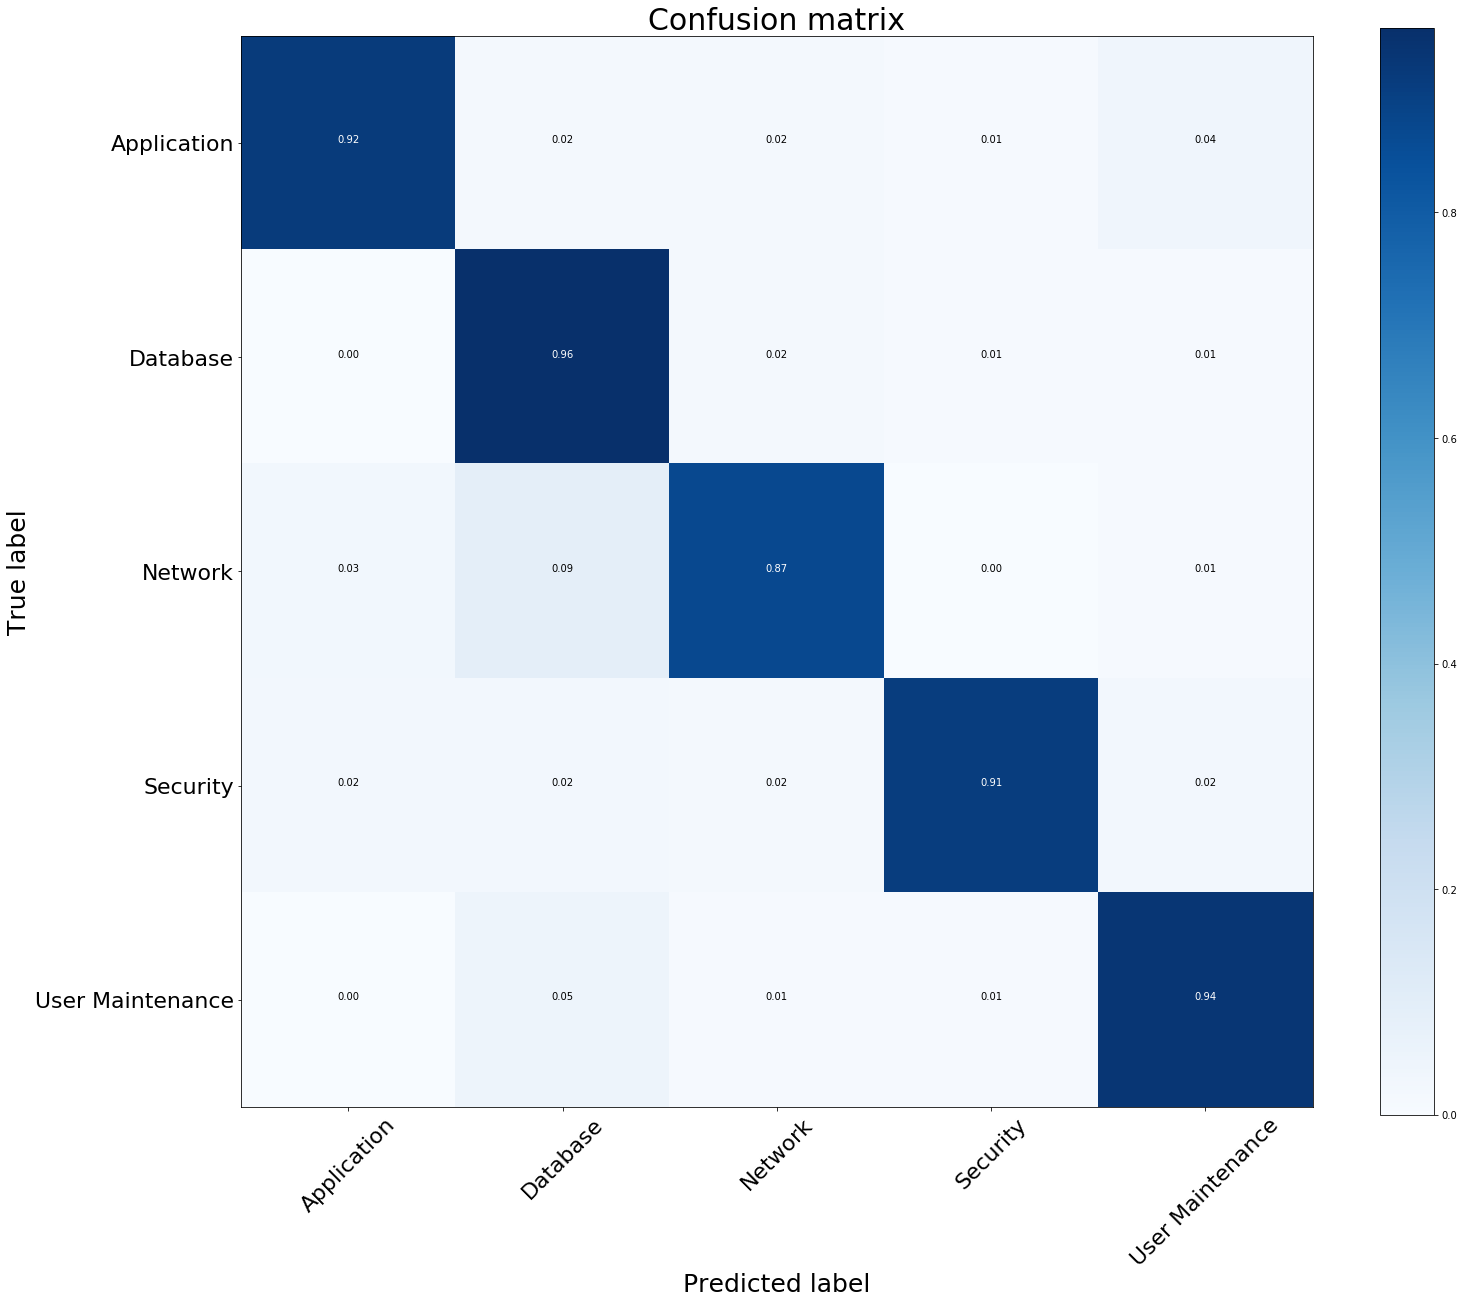

In [37]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools

encoder = LabelEncoder()
encoder.fit(['Application', 'Database', 'Network', 'Security', 'User Maintenance'])
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [109]:
from sklearn.externals import joblib

joblib.dump(text_clf, 'text_classifier.pkl')

['text_classifier.pkl']